# Part I - (Loan Data From Prosper Dataset Exploration)
## by Inioluwa Mofiyinfoluwa Olaniran

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#biva">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusions</a></li>   
</ul>

<a id='intro'></a>
## Introduction

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It has 183412 observations (row) with 16 features (columns).


<a id='wrangling'></a>
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#setting the default for the plots in the document
base_color = '#063175'

%matplotlib inline


In [2]:
#reading in the dataset for wrangling and exploration
bikes = pd.read_csv('fordgobike_tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
#getting the decriptive statistics of the rows and columns in the dataset
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


In [5]:
#changing the start_time and end_time columns' datatype to datetime.
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

In [6]:
#changing the datatype for the bike_share_for_all_trip to boolean
bikes.bike_share_for_all_trip = (bikes.bike_share_for_all_trip == 'Yes')

In [9]:
#checking to see if there are duplicates in the dataset
bikes.duplicated().sum()

0

In [10]:
#checking for null values in the dataset
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
#dropping columns that are not needed for the exploration
bikes.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
           axis=1, inplace=True)

In [12]:
#getting the information(like the datatypes, the RangeIndex, the number of entries in the dataset and so on) of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  bool          
dtypes: bool(1), date

In [13]:
#changing user type, gender and bike_share_for_all_trip datatypes to category
bikes.user_type = bikes.user_type.astype('category')
bikes.member_gender = bikes.member_gender.astype('category')
bikes.bike_share_for_all_trip = bikes.bike_share_for_all_trip.astype('category')

In [14]:
#changing bike id, start_station_id, end_station_id datatypes (int64 and float64) to object datatype
bikes.bike_id = bikes.bike_id.astype(str)
bikes.start_station_id = bikes.start_station_id.astype(str)
bikes.end_station_id = bikes.end_station_id.astype(str)

In [15]:
#checking to see if the change of columns datatype has been implemented
bikes.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  category      
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  category      
 11  bike_share_for_all_trip  183412 non-null  category      
dtypes: category(3), 

In [16]:
#getting the descriptive statistics of the columns with the int64 datatype
bikes.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


Since the minimum birth year is before the 1900, then a limit has to set to be worked on. The maximum age of a biker for this project should be 65.

In [17]:
#substract the member_birth_year from the year which the dataset was gathered (which is 2019) to get ages of the bikers from the 
#dataset
bikes['member_age'] = 2019-bikes['member_birth_year']

In [18]:
#setting member_age <= 65 automatically removes null values
bikes = bikes.query('member_age <=65')

In [19]:
#changing the member_age and birth year columns datatypes to integer datatype
bikes.member_age = bikes.member_age.astype(int)
bikes.member_birth_year = bikes.member_birth_year.astype(int)

In [20]:
#checking to see if the previous codes have been implemented
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,False,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,False,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,False,60


In [21]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173768 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173768 non-null  int64         
 1   start_time               173768 non-null  datetime64[ns]
 2   end_time                 173768 non-null  datetime64[ns]
 3   start_station_id         173768 non-null  object        
 4   start_station_name       173573 non-null  object        
 5   end_station_id           173768 non-null  object        
 6   end_station_name         173573 non-null  object        
 7   bike_id                  173768 non-null  object        
 8   user_type                173768 non-null  category      
 9   member_birth_year        173768 non-null  int32         
 10  member_gender            173768 non-null  category      
 11  bike_share_for_all_trip  173768 non-null  category      
 12  member_age      

In [22]:
#converting the member_birth_year column's datatype from int32 to int64
bikes['member_birth_year']=bikes.member_birth_year.astype(np.int64)

In [23]:
#converting the member_age column's datatype from int32 to int64
bikes['member_age']=bikes.member_age.astype(np.int64)

In [24]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173768 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173768 non-null  int64         
 1   start_time               173768 non-null  datetime64[ns]
 2   end_time                 173768 non-null  datetime64[ns]
 3   start_station_id         173768 non-null  object        
 4   start_station_name       173573 non-null  object        
 5   end_station_id           173768 non-null  object        
 6   end_station_name         173573 non-null  object        
 7   bike_id                  173768 non-null  object        
 8   user_type                173768 non-null  category      
 9   member_birth_year        173768 non-null  int64         
 10  member_gender            173768 non-null  category      
 11  bike_share_for_all_trip  173768 non-null  category      
 12  member_age      

In [25]:
#storing all the edits into a new csv file
bikes.to_csv('fordgo_bikedata_work.csv')

### What is the structure of your dataset?

> There are 171617 rows with 13 columns. The dataset's features have the following the datatypes: int64(3), datetime64(2), category(3) and object(5). The features are also mostly numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the relationship that the trip duration (column duration_sec) has with the member_age/ member_birth_year, and member_gender columns.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would help support the feature of interest are duration_sec, member_gender and member_age or member_birth_year features.

<a id='uni'></a>
## Univariate Exploration

>First, starting with the distribution plot of the trip duration

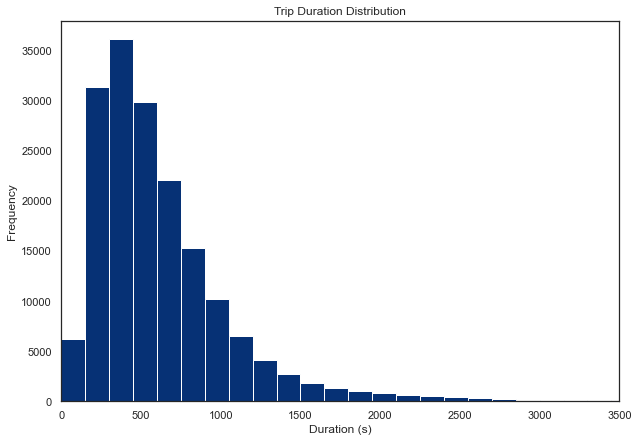

In [26]:
#start with a standard-scaled plot
bin_edges = np.arange(0, bikes['duration_sec'].max()+100, 150)

plt.figure(figsize=[10, 7])
sb.set_theme(style='white', palette='colorblind')
plt.hist(data = bikes, x = 'duration_sec', bins = bin_edges, color=base_color)
plt.xlim(0,3500)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency');

There is a long tail in the distribution plot, so we will put it on a log scale plot instead

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_21744/3410102058.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 13000])


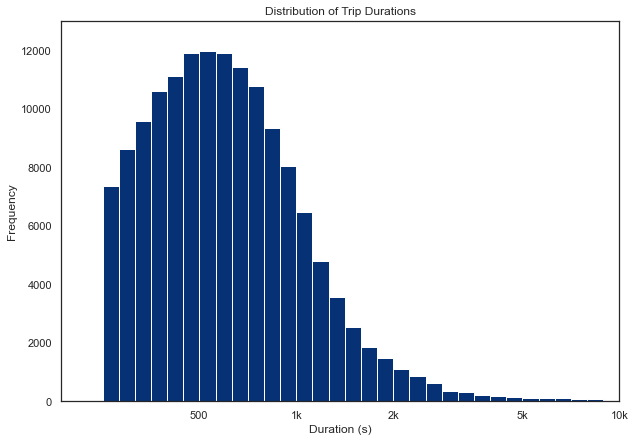

In [27]:
#there's a long tail in the distribution, so let's put it on a log scale instead
logbinsizes = 0.05
bins_ = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max()) + logbinsizes, logbinsizes)

plt.figure(figsize=[10, 7])
sb.set_theme(style='white', palette='colorblind')
plt.hist(data = bikes, x = 'duration_sec', bins = bins_, color=base_color)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 13000])
plt.show();

From this plot, it shows that the trip duration 500 and 1000 seconds are higher in their frequency. Which means that most people's trip duration is between 500 and 1000 seconds. It also shows that as the time increases from 1000 seconds, the trip duration according to the frequency reduces.

Plotting the distribution plots of the ages of the users using the member_age and member_birth_year columns.

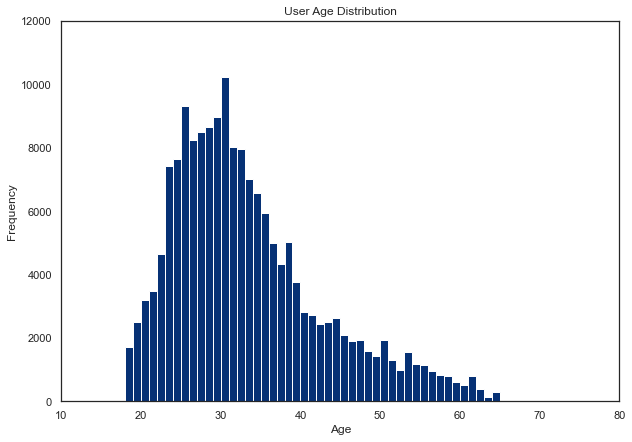

In [28]:
#plotting the distribution of the ages of the users derived from user's birth year.
bin_size = 1
bins = np.arange(0, bikes['member_birth_year'].astype(float).max()+bin_size, bin_size)

plt.figure(figsize=[10, 7])
sb.set_theme(style='white', palette='colorblind')
plt.hist(data = bikes.dropna(), x = 'member_birth_year', bins = bins, color=base_color)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009],
           [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

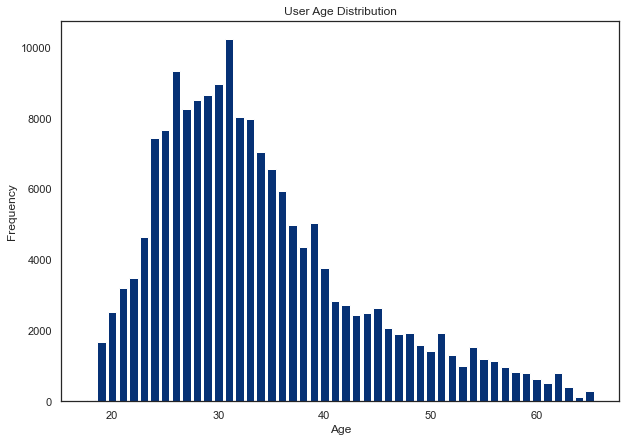

In [30]:
#plotting user age from the member_age column on the bar chart
plt.figure(figsize=[10,7])
sb.set_theme(style='white', palette='colorblind')
plt.bar(x = bikes.member_age.value_counts().keys(), height = bikes.member_age.value_counts(), color=base_color )
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the distribution plots above, it shows that an age between ages 30-35 bike the most.

Plotting the distribution of the user_type column which has a category datatype 

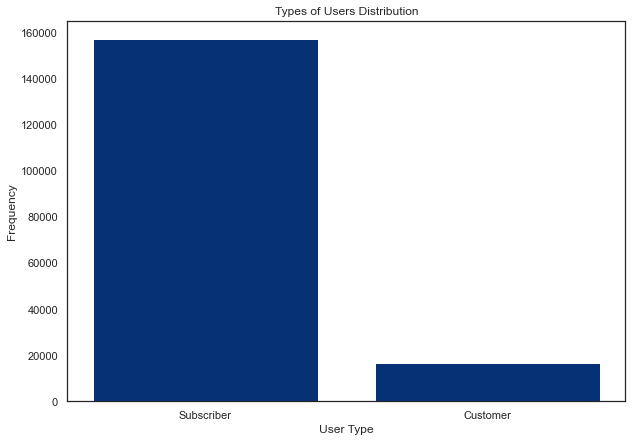

In [29]:
#plotting a bar chart of the user_type column
plt.figure(figsize=[10,7])
sb.set_theme(style='white', palette='colorblind')
plt.bar(x = bikes.user_type.value_counts().keys(), height = bikes.user_type.value_counts(), color=base_color)
plt.title('Types of Users Distribution')
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.show()

From the Type of Users Distribution above, it shows there are more people who subscribe than there are customers.

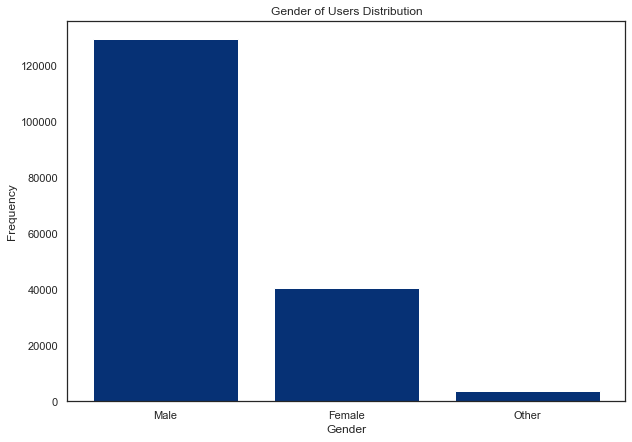

In [31]:
#plotting the genders of users 
plt.figure(figsize=[10,7])
sb.set_theme(style='white', palette='colorblind')
plt.bar(x = bikes.member_gender.value_counts().keys(), height = bikes.member_gender.value_counts(),color=base_color )
plt.title('Gender of Users Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip Duration Distribution Plots.
  A regular histogram was plotted but a long tail was shown in the results and so the plot was transfered to a log scale type of plot to understand the plot better. From the plots, it was shown that the trip duration 500 and 1000 seconds are higher in their frequency. Which means that most people's trip duration is between 500 and 1000 seconds. It also shows that as the time increases from 1000 seconds, the trip duration according to the frequency reduces.
  
> Member_age/Member_birth_year Distribution Plots.
  Users from an age between ages 30-35 bike the most as they have a higher frequency on the distribution plot.
 
> User_type Distribution Plots.
  From the plot, it shows that there are more users who subscribe that there are users who are only customers.

> Member_gender Distribution Plots.
  The plot shows that the male gender bike the most and the other gender (unidentified genders) bike the least out of the 3 categories of genders.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Changing the datatypes of the user_type, member_gender and bike_share_for_all_trip columns to category datatype.

> Changing the datatype of the columns start_time and end_time to datetime64 datatype.

> Changing the bike_id, start_station_id and end_station_id datatypes to object datatype.

> Dropping start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude columns as they are not needed for my analysis.

> Calculating user's age for people born after 1900 and setting the ages below 65.

<a id='biva'></a>
## Bivariate Exploration


Plotting the distribution relationship between the user age and trip duration

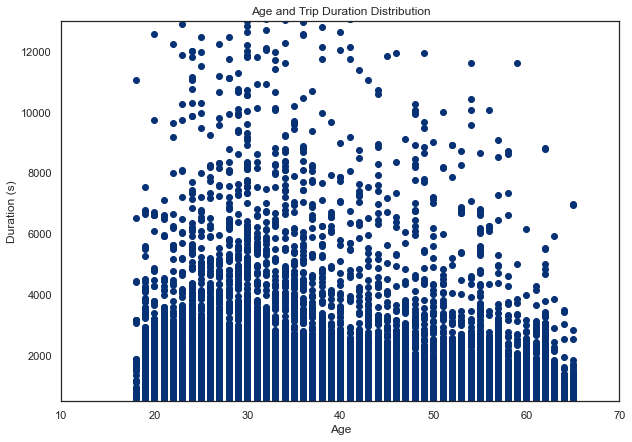

In [34]:
#plotting the distribution of the relationship between the users' age and the trip duration
plt.figure(figsize=[10,7])

sb.set_theme(style='white', palette='colorblind')
plt.scatter((bikes['member_age']), bikes['duration_sec'], alpha = 1, marker = 'o', color=base_color)
plt.axis([10, 70, 500, 13000])
plt.title('Age and Trip Duration Distribution')
plt.xlabel('Age')
plt.ylabel('Duration (s)')
plt.show();

The plot above shows that the duration is more concentrated from age 20 to 50.

Plotting the distribution relationship between the users' gender and their trip duration

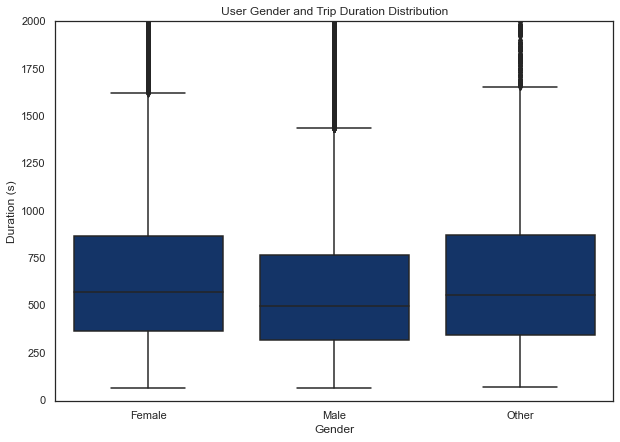

In [35]:
#plotting the distribution relationship between the users' gender and their trip duration
plt.figure(figsize = [10, 7])
sb.set_theme(style='white', palette='colorblind')
sb.boxplot(data = bikes, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('User Gender and Trip Duration Distribution')
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
plt.show()

The box plot shows that the other and female gender have similar durations but other has a slightly higher trip duration.

Plotting the distribution relationship between the user type and the trip duration

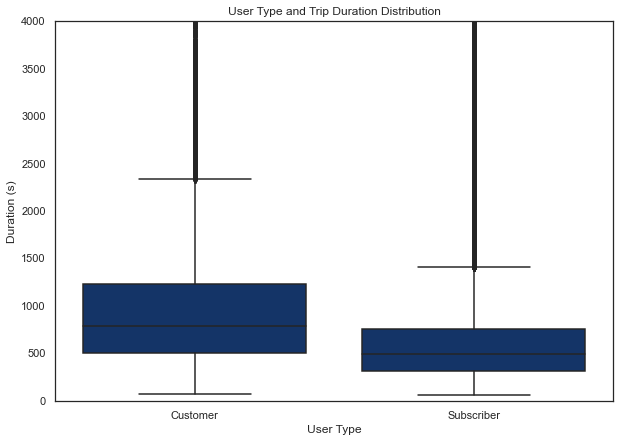

In [36]:
#plotting the distribution relationship between the user type and the trip duration
plt.figure(figsize = [10, 7])
sb.set_theme(style='white', palette='colorblind')
sb.boxplot(data = bikes, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 4000])
plt.title('User Type and Trip Duration Distribution')
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.show()

The plot above show that users who are customers have the most trip duration than subscribers.

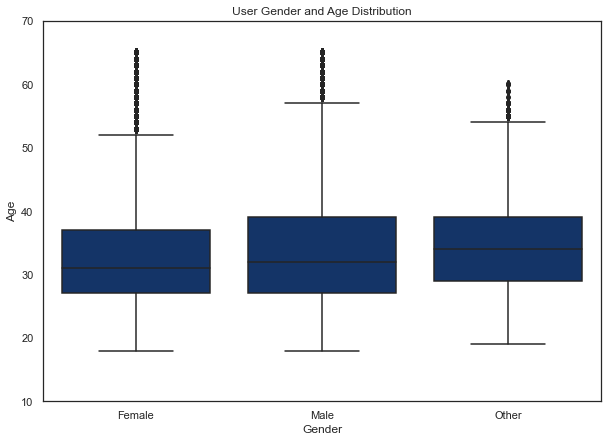

In [37]:
#plotting the distribution relationship between the users' gender and the ages of users
plt.figure(figsize = [10, 7])
sb.set_theme(style='white', palette='colorblind')
sb.boxplot(data = bikes, x = 'member_gender', y = 'member_age', color = base_color)
plt.ylim([10, 70])
plt.title('User Gender and Age Distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The plot shows the male gender have more users between the ages of 40 to 55 and the female gender have users between the ages 40 to 52.

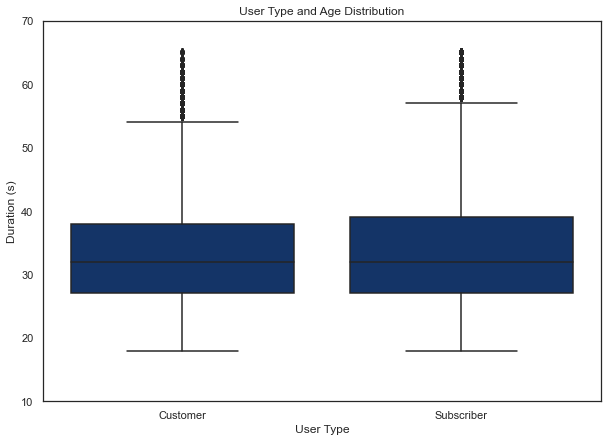

In [38]:
#plotting the distribution relationship between the user type and the ages of the users
plt.figure(figsize = [10, 7])
sb.set_theme(style='white', palette='colorblind')
sb.boxplot(data = bikes, x = 'user_type', y = 'member_age', color = base_color)
plt.ylim([10, 70])
plt.title('User Type and Age Distribution')
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.show()

From the box plot above, it is implemented that users who are subscribers are more between the ages of forty to fifty something.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip duration and member age.
  From the scatter plot, it shows that as the age increases, the trip duration decreases.
  
> Trip Duration and User Gender. 
  Female and Other gender have similar trip durations with other having a slight increase in trip duration.
  
> Trip Duration and User Type. 
  From the boxplot, it is shown that customers bike more than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> member_age and member_gender. 
  It shows that the male gender have people who like to bike between the age of 30 to 40. It is also seen that women between the age of 60 to 65 bike more than the women with ages between 30 to 40.
  
> member_age and user_type. 
  From the distribution, it shows that subscribers are more between the ages forty to fifty something.

<a id='multi'></a>
## Multivariate Exploration


Plotting the distribution plot of the user age, gender and  trip duration

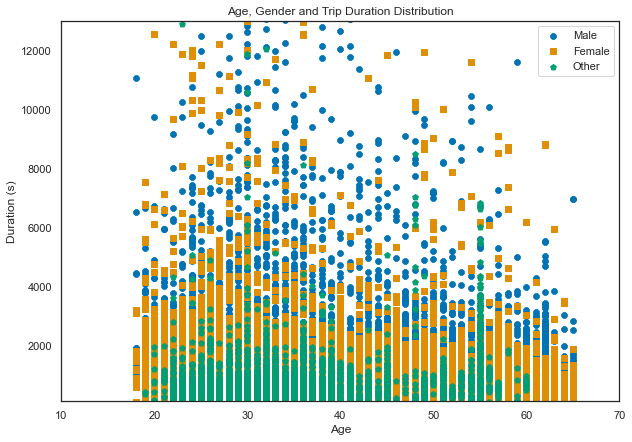

In [40]:
#plotting the relationship duration of the user age, gender and trip duration.
usergender_mark = [['Male', '8'],['Female', 's'],['Other', 'p']]
plt.figure(figsize = [10, 7])
for genders1, marker in usergender_mark:
    bikes_gender = bikes[bikes['member_gender'] == genders1]
    plt.scatter((bikes_gender['member_age']), bikes_gender['duration_sec'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([10, 70, 100, 13000 ])
plt.title('Age, Gender and Trip Duration Distribution')
plt.xlabel('Age')
plt.ylabel('Duration (s)')
plt.show();

Since the above distribution plot is not understandable, it is better to split the columns involved into three different plots to represent the three genders properly.

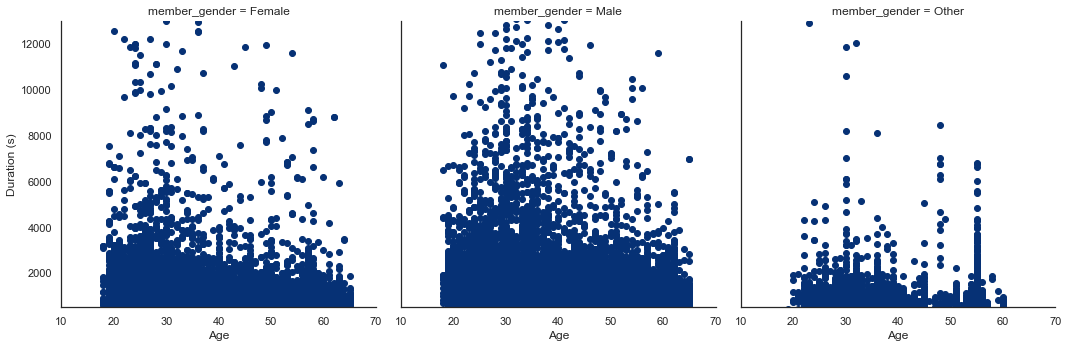

In [42]:
#plotting the relationship duration of the user age, gender and trip duration into 
#three diffrent plots to show the three classes of gender in the dataset.
sb.set_theme(style='white', palette='colorblind')
gender = sb.FacetGrid(data = bikes, col = 'member_gender', col_wrap = 3, height = 5,
                 xlim = [10, 70], ylim = [500, 13000])
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1, color=base_color)


gender.set_xlabels('Age')
gender.set_ylabels('Duration (s)')
#gender.fig.suptitle('Age, Gender and Trip Duration Distributions')
plt.show()

From the three plots, it is shown that males are more active as their plot is more concentrated than the other two meaning males have more trip durations than the other genders and the duration decreases as they get older.

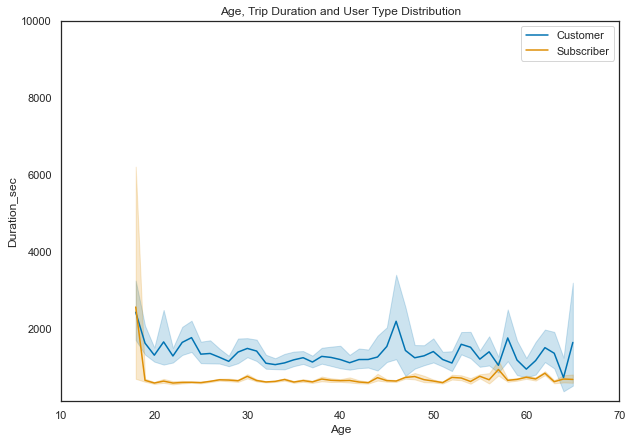

In [51]:
#plotting the relationship duration of the user age, type and trip duration.
#usertype_mark = [['Customer', 'v'],['Subscriber', 'p']]

#for usertype, marker in usertype_mark:
#    bikes_usertype = bikes[bikes['user_type'] == usertype]
#    plt.scatter((bikes_usertype['member_age']), bikes_usertype['duration_sec'], marker = marker, alpha= 1)

#df = pd.melt(bikes, id_vars=['member_age', 'user_type'])

#the data is one categorical based data and two numerical based data, so a boxplot cannot be used to plot this distribution.
plt.figure(figsize = [10, 7])
sb.lineplot(x='member_age', y='duration_sec', data=bikes, palette='colorblind', hue='user_type')
plt.legend(['Customer','Subscriber'])
plt.axis([10, 70, 100, 10000 ])
plt.title('Age, Trip Duration and User Type Distribution')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

This plot proves that there are users that are subscribers than there are customers. But the plot is not completely understandable, we will separate the plot into two different plots for the two categories of user type.

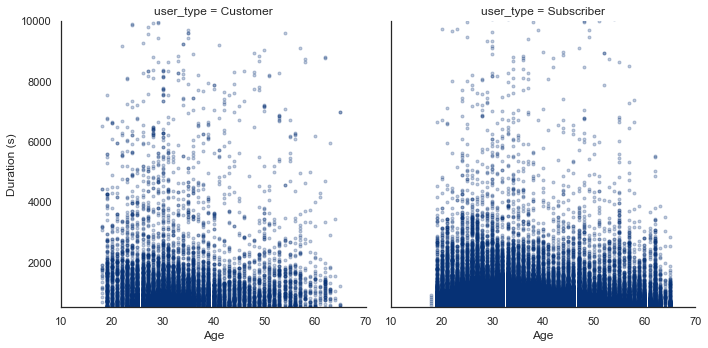

In [50]:
#plotting the relationship duration of the user age, type and trip duration into two different plots
#to represent the two types of users.
sb.set_theme(style='white', palette='colorblind')
gender = sb.FacetGrid(data = bikes, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [10, 70], ylim = [500, 10000])
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 0.25, color=base_color, marker='.')


gender.set_xlabels('Age')
gender.set_ylabels('Duration (s)')
#gender.fig.suptitle('Age, Gender and Trip Duration Distributions')
plt.show()

The subscriber plot is more condensed and concentrated in terms of data from the plot above. It also shows that as the user type customer ages, there are less trips taken.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The plots helped to strengthen the fact that as each of the user ages, thr trip duration decreases. It is stronger between the ages of twenty (20) to fifty (50). We also learnt that males bike a lot more than the other genders do as the male gender scatter plot was more concentrated than the rest.

### Were there any interesting or surprising interactions between features?

> For customers and subscribers, it was kind of a shock and a surprise that people that are older have slightly high trip durations.

<a id='conclusion'></a>
## Conclusions
> Data Exploration. 
  For the data exploration stages (univariate, bivariate and multivariate exploration), there were various plots that were used to get information. The plots used in the stages are: scatter plot, box plot, histogram and bar chart. These plots helped determine the findings related to the main feature extracted for analysis.

> Main Findings. 
  All the plots helped to find that as a user ages (no matter type or gender), the trip duration reduces significantly. The ages where the trip duration is the strongest is between ages twenty (20) to fifty (50).
